<a href="https://colab.research.google.com/github/ode1ay/GJAI/blob/master/GJAI_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3주차 과제
- 학습률 최적화
- 군집 분석(병합 계층 군집) 구현 클론 코딩
- Cost function 구현

## 1. 학습률 최적화

간단한 예제를 통해 학습률 최적화의 중요성에 대해서 확인 해 보도록 하겠습니다.

아래 링크에서 __1단계만__에 손실 곡선의 최저점에 도달하게 하는 학습률을 찾아 정답을 적어주세요

링크: https://developers.google.com/machine-learning/crash-course/fitter/graph?hl=ko

### 정답 : 1.60

## 2. 군집 분석(병합 계층 군집) 구현 클론 코딩

군집 분석 강의(군집문제[2] 3:10 ~ 5:20 부분)를 보고 코드를 따라 치며 출력 결과(과제 설명 페이지 참고)를 만드세요. 

강의에서는 데이터 시각화까지 진행하지만 
과제에서는 표를 출력하는 것 까지만 하시면 됩니다.

3주차 과제 안내 페이지를 보시면 표에 대한 이미지가 있습니다. 참고해주세요

#### 데이터 생성하기

In [1]:
import numpy as np
np.random.seed(123)
X=np.random.random_sample([5,3])*10 # 0~1사이 임의의 실수를 5*3 행렬로 생성. 어느 정도 거리를 만들기 위해 10을 곱함
X

array([[6.96469186, 2.86139335, 2.26851454],
       [5.51314769, 7.1946897 , 4.2310646 ],
       [9.80764198, 6.84829739, 4.80931901],
       [3.92117518, 3.43178016, 7.29049707],
       [4.38572245, 0.59677897, 3.98044255]])

In [2]:
import pandas as pd
variables = ['X','Y','Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
df = pd.DataFrame(X, columns=variables, index=labels) # dataframe 만들기
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


#### 모든 데이터의 거리행렬 계산하기

In [0]:
from scipy.spatial.distance import pdist, squareform

In [5]:
Y = pdist(df) # pdist: n차원 공간의 객체간의 짝 거리(pariwise distance) (5개 객체이므로 객체간 거리는 순열조합 수 5*4/2=10개. 아래 행렬표 참고)
Y

array([4.973534  , 5.51665266, 5.89988504, 3.83539555, 4.34707339,
       5.10431109, 6.69823298, 7.24426159, 8.31659367, 4.382864  ])

In [6]:
row_dist = pd.DataFrame(squareform(pdist(df,metric='euclidean')), columns=labels, index=labels) # 거리행렬 벡터를 행렬형식으로 변환
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [0]:
from scipy.cluster.hierarchy import linkage # 병합방식 적용 위한 패키지 import

In [13]:
row_clusters = linkage(row_dist, method='complete', metric='euclidean') # 그냥 squareform 함수 통과시킨 데이터프레임 넣어주면 기대와 다른 결과 출력 
row_clusters

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


array([[ 0.        ,  4.        ,  6.52197264,  2.        ],
       [ 1.        ,  2.        ,  6.72960262,  2.        ],
       [ 3.        ,  5.        ,  8.53924727,  3.        ],
       [ 6.        ,  7.        , 12.44482356,  5.        ]])

In [0]:
#help(linkage) # pdist 함수에서 축약된 거리 행렬을 입력 속성으로 사용. linkage 함수에서 초기 데이터 배열을 전달하고 euclidean 지표를 매개변수로 사용

In [15]:
row_clusters = linkage(pdist(df,metric='euclidean'), method='complete') # 축약된 거리 행렬을 사용해 올바른 거리행렬 얻기 
row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [16]:
row_clusters = linkage(df.values, method='complete', metric='euclidean') # 원본 샘플 행렬을 사용해 올바른 연결행렬 얻기
row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [17]:
# 군집결과를 자세히 살펴보기 위해 결과를 pd.dafaframe으로 변환
pd.DataFrame(row_clusters, 
             columns=['row label 1','row label 2','distance','no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [0]:
# 클러스터는 4개 나옴
# row label 1, row label 2를 통해 각 클러스터에서 완전연결방식으로 병합된 클러스터 확인 가능
## (예: cluster1 - ID_0, ID_4 병합, cluster2 - ID_1, ID_2 병합, cluster3 - ID_3, ID_5(ID_0+ID_4) 병합, cluster4 - ID_6(ID_3,ID_5), ID_7(ID_1,ID_2) 병합)
# 세번째 열은 클러스터 간 거리 의미(예: cluster1에서 ID_0, ID_4간 거리는 3.835)
# 네번째 열은 클러스터에 속한 아이템 수(예: cluster1의 아이템 수는 2개)

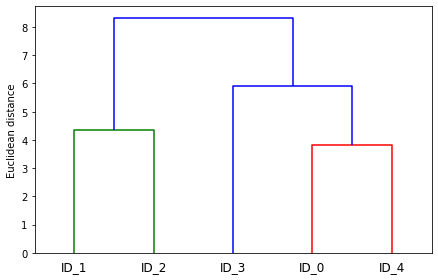

In [19]:
# 덴드로그램 그리기
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

## 3. Cost function 구현
## $$cost(W) =  \frac{1}{n}\sum_{i=1}^n (Wx^{(i)}-y^{(i)})^2$$

### 데이터(X, Y)

In [0]:
# 제공된 데이터는 변경 할 수 없습니다.
x = [1, 2, 3]
y = [2, 4, 6]

### cost function을 파이썬으로 구현하세요.
pass를 지우고 cost_func 함수를 완성하세요.

가중치(Weight)를 입력하면 코스트(cost)를 계산하는 함수를 만드는게 목적입니다.

In [0]:
# W(가중치) 데이터 타입 -> int or float
# x(학습 데이터) 데이터 타입 -> list
# y(정답 데이터) 데이터 타입 -> list
# cost_func 함수 리턴값 타입 -> float
# cost_func 함수 리턴값 = cost 값
# W:가중치, x:학습 데이터 y:정답 데이터

def cost_func(W, x, y):
  sum = 0
  for i in range(len(x)):
    sum += (W*x[i]-y[i])**2
  return sum/len(x)  

예시) x가 [1, 2] 이고 y가 [3, 6] 그리고 W가 4 일 경우  cost_func(W, x, y)함수의 리턴값은 2.5

In [22]:
#x=[1,2]; y=[3,6]; W=4
#cost_func(W,x,y)

2.5

### cost_func을 활용하여 웨이트(Weight)가 -5부터 5까지의 변화에 따른 코스트(cost)를 출력 해주세요.

In [25]:
# 여기 코드셀은 변경하지 마세요.
# 완성된 함수를 확인하는 과정으로 해당 코드셀을 실행해서 정상 출력되면 정답!
# 주의! 에러가 날 경우 데이터 코드셀과 cost function 코드셀을 실행했는지 확인해주세요.
for feed_W in range(-5, 6, 1):
  curr_cost = cost_func(feed_W, x, y)
  print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-5.000 |  228.66667
-4.000 |  168.00000
-3.000 |  116.66667
-2.000 |   74.66667
-1.000 |   42.00000
 0.000 |   18.66667
 1.000 |    4.66667
 2.000 |    0.00000
 3.000 |    4.66667
 4.000 |   18.66667
 5.000 |   42.00000
